# Importing all the lib and connceting breez api

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta,TH , TU
import warnings
warnings.filterwarnings('ignore')
import ta
import pandas_ta as ta
import matplotlib.pyplot as plt
from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="22044277")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


# getting all the daily data for the backtest period of nifty

In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2019-01-01T07:00:00.000Z",
                            to_date= "2023-06-19T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
m =pd.DataFrame(n['Success'])
m.index = m.datetime
m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m.rename( {'datetime' : 'date'} , inplace = True)
m['Expiry'] = 0
for i in range (len(m)) :
    m['Expiry'].iloc[i] = pd.to_datetime(m.index[i]).date() + relativedelta( weekday=TH(+1))
    #m['weekday'] = pd.to_datetime(m['Expiry'][i]).weekday()
m

,close,high,low,open,Expiry
datetime,,,,,
2019-06-11 00:00:00,11962.65,12000.35,11904.35,11959.85,2019-06-13
2019-06-12 00:00:00,11917.30,11962.45,11866.35,11962.45,2019-06-13
2019-06-13 00:00:00,11905.55,11931.35,11817.05,11873.90,2019-06-13
2019-06-14 00:00:00,11810.85,11911.85,11797.70,11910.10,2019-06-20
2019-06-17 00:00:00,11674.85,11844.00,11657.75,11844.00,2019-06-20
...,...,...,...,...,...
2023-06-13 00:00:00,18718.65,18727.75,18631.80,18631.80,2023-06-15
2023-06-14 00:00:00,18749.65,18769.50,18690.60,18744.60,2023-06-15
2023-06-15 00:00:00,18682.15,18793.90,18669.05,18774.45,2023-06-15


In [ ]:
n = breeze.get_historical_data_v2(interval="5minute",
                            from_date= "2023-02-15T07:00:00.000Z",
                            to_date= "2023-02-28T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
m1 =pd.DataFrame(n['Success'])
m1.index = m1.datetime
m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m1.rename( {'datetime' : 'date'} , inplace = True)
#m1 = m1[2:]

n = breeze.get_historical_data_v2(interval="5minute",
                            from_date= "2023-03-20T07:00:00.000Z",
                            to_date= "2023-04-10T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
m2 =pd.DataFrame(n['Success'])
m2.index = m2.datetime
m2.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m2.rename( {'datetime' : 'date'} , inplace = True)
#m2 = m2[2:]

mm = pd.concat([m1,m2])
mm['ema'] = mm['close'].ewm(com=5).mean()
mm['ema'].astype(float).astype(int)
mm

,close,high,low,open,ema
datetime,,,,,
2023-02-15 09:05:00,17896.60,17896.60,17896.60,17896.60,17896.600000
2023-02-15 09:10:00,17896.60,17896.60,17896.60,17896.60,17896.600000
2023-02-15 09:15:00,17890.80,17900.30,17878.00,17896.60,17894.305495
2023-02-15 09:20:00,17880.70,17892.05,17865.65,17891.50,17889.925782
2023-02-15 09:25:00,17871.60,17883.20,17867.20,17881.85,17884.819308
...,...,...,...,...,...
2023-04-06 15:05:00,17601.75,17606.60,17598.55,17605.35,17597.752679
2023-04-06 15:10:00,17591.35,17602.90,17590.70,17600.80,17596.685566
2023-04-06 15:15:00,17592.55,17601.95,17591.00,17591.90,17595.996305


# manuual random intraday stattegy check . enter date of intraday

In [ ]:
s =  "2023-03-23T07:00:00.000Z"
ss =  "2023-03-24T07:00:00.000Z"
ni = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date = ss  ,
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
nifty_intraday =pd.DataFrame(ni['Success'])
nifty_intraday.index = nifty_intraday.datetime
nifty_intraday.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'  }  , inplace = True)
nifty_intraday.rename( {'datetime' : 'date'} , inplace = True)
nifty_intraday['10 ema'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].ema
#nifty_intraday['supb'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].supb
#nifty_intraday['sups'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].sups

nifty_intraday =nifty_intraday[2:]

#print(nifty_intraday)








strike_multiple = 50
nifty_intraday['10 ema'] = round(nifty_intraday['10 ema'])
nifty_intraday['ATM STRIKE'] = strike_multiple*( round(nifty_intraday['10 ema'] / strike_multiple ) )
nifty_intraday['Switch'] = 0
nifty_intraday['Switch'].iloc[0] = 1
for i in range (len(nifty_intraday)) :
    if nifty_intraday['ATM STRIKE'].iloc[i] != nifty_intraday['ATM STRIKE'].iloc[i-1] :
        nifty_intraday['Switch'].iloc[i] = 1
    elif nifty_intraday['ATM STRIKE'].iloc[i] != nifty_intraday['ATM STRIKE'].iloc[i-1] :
        nifty_intraday['Switch'].iloc[i] = 0




#nifty_intraday['ATM STRIKE'].value_counts()
#nifty_intraday['Switch'].value_counts(
nifty_intraday['ATM STRIKE'] = nifty_intraday['ATM STRIKE'].astype(float).astype(int)
nifty_intraday['10 ema'] = nifty_intraday['10 ema'].astype(float).astype(int)
nifty_intraday

e = m[m.index == (s[0:10] + ' ' + '00:00:00') ]
Expiry =str(e.Expiry[0])
p =nifty_intraday[nifty_intraday['Switch'] == 1]
#nifty_intraday
#for i in range (len(p)) :
#    p.iloc[i]['datetime'][11:19]
p


,close,high,low,open,10 ema,ATM STRIKE,Switch
datetime,,,,,,,
2023-03-23 09:15:00,17077.95,17097.40,17062.20,17097.40,17121,17100,1
2023-03-23 10:20:00,17157.70,17166.35,17142.95,17146.00,17128,17150,1
2023-03-23 12:45:00,17200.85,17202.20,17192.55,17192.95,17178,17200,1
2023-03-23 13:55:00,17160.00,17160.65,17153.55,17157.00,17173,17150,1
2023-03-23 14:40:00,17092.40,17107.15,17081.50,17106.05,17125,17100,1


# entire trade result,detail,profit,entry,exit etc for that day

  Entry Time Exit Time  Entry Price  Exit Price   Points    profit
0      09:15     10:20    105.24465     95.7957  9.44895  2834.685
  Entry Time Exit Time  Entry Price  Exit Price   Points    profit
0      09:15     10:20    105.24465    95.79570  9.44895  2834.685
1      10:25     12:45     82.11780    75.22515  6.89265  2067.795
  Entry Time Exit Time  Entry Price  Exit Price   Points    profit
0      09:15     10:20    105.24465    95.79570  9.44895  2834.685
1      10:25     12:45     82.11780    75.22515  6.89265  2067.795
2      12:50     13:55     57.79215    54.90485  2.88730   866.190
  Entry Time Exit Time  Entry Price  Exit Price    Points    profit
0      09:15     10:20    105.24465    95.79570   9.44895  2834.685
1      10:25     12:45     82.11780    75.22515   6.89265  2067.795
2      12:50     13:55     57.79215    54.90485   2.88730   866.190
3      14:00     14:40     43.20675    62.06200 -18.85525 -5656.575
  Entry Time Exit Time  Entry Price  Exit Price    Points

,Entry Time,Exit Time,Entry Price,Exit Price,Points,profit
0,09:15,10:20,105.24465,95.79570,9.44895,2834.685
1,10:25,12:45,82.11780,75.22515,6.89265,2067.795
2,12:50,13:55,57.79215,54.90485,2.88730,866.190
3,14:00,14:40,43.20675,62.06200,-18.85525,-5656.575
4,14:45,15:25,31.71825,23.27325,8.44500,2533.500
5,0,0,0.00000,0.00000,8.81865,2645.595


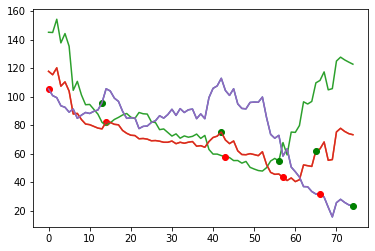

In [ ]:
c_points = 0
fig1 = plt.figure()
import math
buy_price = 0
exit_price = 0
trade = 0
cols = ['Entry Time' , 'Exit Time' , 'Entry Price' , 'Exit Price' , 'Points' , 'profit' ]
new = 1
d = []
ent = []
ext = []
for i in range (len(nifty_intraday)) :
    if new == 1  :
        w = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date= ss,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= Expiry,
                            right="call",
                            strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
        w =pd.DataFrame(w['Success'])
        w.index = pd.to_datetime(w.index)
        w =w[ ['close' , 'datetime'] ]
        w.reset_index(drop=True, inplace=True)
        for j in range (len(w)) :
            w['datetime'].iloc[j] = w['datetime'].iloc[j][11:16]


        ww = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date= ss,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= Expiry,
                            right="put",
                            strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
        ww =pd.DataFrame(ww['Success'])
        ww.index = pd.to_datetime(ww.index)
        ww =ww[ ['close' , 'datetime'] ]
        ww.reset_index(drop=True, inplace=True)
        for j1 in range (len(ww)) :
            ww['datetime'].iloc[j1] = ww['datetime'].iloc[j1][11:16]

        ent.append([ww['close'].iloc[i] , w['close'].iloc[i]])
        ww['close'] = ww['close'] + w['close']
        buy_price = ww['close'].iloc[i] - 0.001* ww['close'].iloc[i]
        buy_time = ww['datetime'].iloc[i]
        new = 0


    if trade == 1  :
        w = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date= ss,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= Expiry,
                            right="call",
                            strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
        w =pd.DataFrame(w['Success'])
        w.index = pd.to_datetime(w.index)
        w =w[ ['close' , 'datetime'] ]
        w.reset_index(drop=True, inplace=True)
        for j2 in range (len(w)) :
            w['datetime'].iloc[j2] = w['datetime'].iloc[j2][11:16]


        ww = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date= ss,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= Expiry,
                            right="put",
                            strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
        ww =pd.DataFrame(ww['Success'])
        ww.index = pd.to_datetime(ww.index)
        ww =ww[ ['close' , 'datetime'] ]
        ww.reset_index(drop=True, inplace=True)
        for j3 in range (len(ww)) :
            ww['datetime'].iloc[j3] = ww['datetime'].iloc[j3][11:16]

        ent.append([ww['close'].iloc[i] , w['close'].iloc[i]])
        ww['close'] = ww['close'] + w['close']
        buy_price = ww['close'].iloc[i] - 0.001* ww['close'].iloc[i]
        buy_time = ww['datetime'].iloc[i]
        trade = 0
        #print(buy_price)
        #print(buy_time)
        #print(i)



    if (nifty_intraday['Switch'].iloc[i] == 1) and (i != 0)  :
        ext.append([ww['close'].iloc[i] , w['close'].iloc[i]])
        exit_price = ww['close'].iloc[i] + 0.001* ww['close'].iloc[i]
        exit_time = ww['datetime'].iloc[i]
        points = buy_price - exit_price
        plt.plot(ww['close'])
        plt.plot( ww[ ww['datetime'] == buy_time ]['close'] , 'ro')
        plt.plot( ww[ ww['datetime'] == exit_time ]['close'] , 'go')
        notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
        span = notional_value * 0.1
        exposure = notional_value * 0.06
        margin_ =  span + exposure
        margin = margin_ + margin_
        q = math.floor( 500000/(margin*0.3) )
        #qq = q/ 50
        #qqq = math.floor(qq)*50
        profit = q*points*50
        #print( q )
        d.append([buy_time , exit_time , buy_price , exit_price , points , profit])
        straddle = pd.DataFrame(d , columns = cols)
        print(straddle)
        #trade = 0
        trade = 1


    if trade == 0 :
        potential_exit = ww['close'].iloc[i]+ 0.0005*ww['close'].iloc[i]
        c_point = potential_exit - buy_price
        notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
        span = notional_value * 0.1
        exposure = notional_value * 0.06
        margin_ =  span + exposure
        margin = margin_ + margin_
        q1 = math.floor( 500000/(margin*0.3) )
        #qq1 = q1/ 50
        #qqq1 = math.floor(qq1)*50
        profit = q1*c_points*50
        if np.shape(d)[0] == 0:
            d_profit = profit
            if d_profit < (-0.03*1000000) :
                break
        if np.shape(d)[0] != 0:
            d_profit = profit + d[-1][-1]
            if d_profit < (-0.03*1000000) :
                break

    if  i == 74  :
        ext.append([ww['close'].iloc[i] , w['close'].iloc[i]])
        exit_price = ww['close'].iloc[i] + 0.001* ww['close'].iloc[i]
        exit_time = ww['datetime'].iloc[i]
        points = buy_price - exit_price
        notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
        span = notional_value * 0.1
        exposure = notional_value * 0.06
        margin_ =  span + exposure
        margin = margin_ + margin_
        q1 = math.floor( 500000/(margin*0.3) )
        #qq1 = q1/ 50
        #qqq1 = math.floor(qq1)*50
        profit = q1*points*50
        ww['close'].plot()
        plt.plot( ww[ ww['datetime'] == buy_time ]['close'] , 'ro')
        plt.plot( ww[ ww['datetime'] == exit_time ]['close'] , 'go')
        d.append([buy_time , exit_time , buy_price , exit_price , points , profit])
        straddle = pd.DataFrame(d , columns = cols)
        print(straddle)
        #trade = 0
        new = 1



#print(ww)
#plt.plot(ww['close'])
summ = 0
summm = 0
for i in range(len(straddle)) :
    summ = summ + straddle['Points'].iloc[i]
    summm = summm + straddle['profit'].iloc[i]
d.append([0 , 0 , 0 , 0 , summ , summm])
straddle = pd.DataFrame(d , columns = cols)
straddle

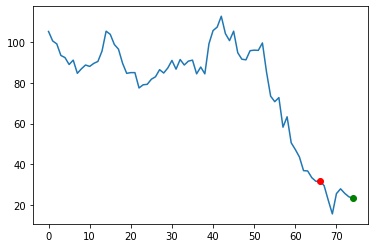

In [ ]:
plt.plot(ww['close'])
plt.plot( ww[ ww['datetime'] == buy_time ]['close'] , 'ro')
plt.plot( ww[ ww['datetime'] == exit_time ]['close'] , 'go')

<AxesSubplot:xlabel='datetime'>

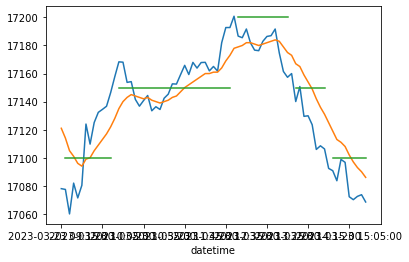

In [ ]:
fig2 = plt.figure()
nifty_intraday.close.plot()
nifty_intraday['10 ema'].plot()
nifty_intraday['ATM STRIKE'] = np.where(nifty_intraday['Switch'] == 1 , np.nan , nifty_intraday['ATM STRIKE'] )
nifty_intraday['ATM STRIKE'].plot()


In [ ]:
nifty_intraday

,close,high,low,open,10 ema,ATM STRIKE,Switch
datetime,,,,,,,
2023-03-23 09:15:00,17077.95,17097.40,17062.20,17097.40,17121,NaN,1
2023-03-23 09:20:00,17077.40,17080.05,17058.80,17078.05,17114,17100.0,0
2023-03-23 09:25:00,17059.95,17079.00,17048.85,17077.10,17105,17100.0,0
2023-03-23 09:30:00,17081.90,17086.10,17046.10,17058.75,17101,17100.0,0
2023-03-23 09:35:00,17071.35,17092.60,17070.35,17082.25,17096,17100.0,0
...,...,...,...,...,...,...,...
2023-03-23 15:05:00,17072.20,17096.05,17057.40,17096.05,17102,17100.0,0
2023-03-23 15:10:00,17070.10,17073.55,17059.60,17073.55,17097,17100.0,0
2023-03-23 15:15:00,17072.45,17078.20,17065.75,17069.90,17093,17100.0,0


# going through 5 min data and calculating ema and geting every date in the backtest period

In [ ]:
f_df = pd.DataFrame()
m['date'] = 0
for i in range (len(m) ) :
    m['date'].iloc[i] = m.index[i][0:10]
date_list = np.array(m['date'])
for dt in range (1,len(date_list)) :
    print(dt)
    reloop = True
    while reloop :
        try :
            start = date_list[dt-1] + 'T07:00:00.000Z'
            end = date_list[dt] + 'T07:00:00.000Z'
            n = breeze.get_historical_data_v2(interval="5minute",
                                    from_date= start ,
                                    to_date=  end ,
                                    stock_code="NIFTY",
                                    exchange_code="NSE",
                                    product_type="cash")
            m1 =pd.DataFrame(n['Success'])
            if len(m1) != 0 :
                m1.index = m1.datetime
                m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
                m1.rename( {'datetime' : 'date'} , inplace = True)
                f_df = pd.concat([f_df ,m1])
                reloop = False

            if len(m1) == 0 :
                reloop = False

        except(ValueError):
            reloop = True
            pass

        except (Exception)  :
            print('loooo')
            continue


f_df['ema'] = f_df['close'].ewm(com=5).mean()
f_df['ema'].astype(float).astype(int)
f_df['Date'] = 0
for i in range (len(f_df)) :
    f_df['Date'].iloc[i] = f_df.index[i][0:10]
df2 = f_df['Date'].drop_duplicates()

mm = f_df
np.array(df2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
loooo
82
83
84
loooo
85
loooo
loooo
loooo
loooo
loooo
86
loooo
loooo
loooo
loooo
loooo
loooo
87
loooo
loooo
loooo
loooo
loooo
88
loooo
loooo
loooo
loooo
loooo
89
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
90
loooo
91
loooo
loooo
loooo
loooo
loooo
loooo
loooo
92
93
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
94
loooo
95
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
96
loooo
loooo
97
loooo
loooo
loooo
loooo
loooo
loooo
98
loooo
loooo
loooo
99
loooo
loooo
loooo
loooo
loooo
loooo
loooo
100
loooo
loooo
loooo
loooo
loooo
101
loooo
loooo
loooo
loooo
loooo
loooo
102
loooo
loooo
loooo
loooo
loooo
103
loooo
loooo
loooo
loooo
loooo
loooo
104
loooo
loooo
loooo
loooo
loooo
loooo
loooo
105
loooo
loooo
106


loooo
294
loooo
loooo
loooo
loooo
loooo
295
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
296
loooo
loooo
loooo
loooo
297
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
298
loooo
loooo
loooo
loooo
299
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
300
loooo
301
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
302
loooo
loooo
loooo
loooo
303
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
304
305
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
306
loooo
loooo
loooo
307
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
308
309
loooo
loooo
loooo
loooo
loooo
loooo
loooo
310
loooo
loooo
loooo
loooo
loooo
loooo
loooo
311
loooo
loooo
loooo
loooo
loooo
loooo
312
loooo
loooo
loooo
loooo
loooo
313
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
314
loooo
loooo
315
loooo
loooo
loooo
loooo
loooo
loooo
loooo
316
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
317
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
318


loooo
491
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
492
loooo
loooo
loooo
loooo
loooo
493
loooo
loooo
loooo
loooo
loooo
loooo
loooo
494
loooo
loooo
loooo
495
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
496
loooo
loooo
497
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
498
loooo
loooo
499
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
500
loooo
loooo
loooo
loooo
501
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
502
loooo
503
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
504
loooo
loooo
loooo
loooo
loooo
loooo
505
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
506
loooo
loooo
loooo
loooo
507
loooo
loooo
loooo
loooo
loooo
loooo
508
loooo
loooo
509
loooo
loooo
loooo
loooo
loooo
510
loooo
511
loooo
loooo
512
loooo
loooo
loooo
loooo
loooo
loooo
513
loooo
loooo
loooo
loooo
loooo
loooo
loooo
514
loooo
loooo
loooo
loooo
loooo
loooo
515
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
516
loooo
loooo
517
loooo
loooo
loooo
loooo
loooo
looo

loooo
loooo
loooo
697
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
698
loooo
loooo
loooo
699
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
700
loooo
loooo
loooo
701
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
702
loooo
loooo
loooo
loooo
703
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
704
loooo
loooo
loooo
loooo
705
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
706
loooo
loooo
loooo
loooo
707
loooo
loooo
loooo
loooo
loooo
loooo
loooo
708
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
709
loooo
loooo
loooo
loooo
710
loooo
loooo
711
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
712
loooo
loooo
loooo
loooo
713
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
714
loooo
loooo
loooo
715
loooo
loooo
loooo
loooo
loooo
loooo
716
loooo
loooo
loooo
loooo
loooo
717
loooo
loooo
loooo
loooo
loooo
loooo
loooo
718
loooo
loooo
loooo
loooo
719
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
720
loooo
loooo
loooo
loooo
loooo
loooo
721
loooo
loooo
loooo
loooo
loooo
loooo


loooo
loooo
913
loooo
loooo
loooo
loooo
loooo
loooo
loooo
914
loooo
loooo
loooo
loooo
loooo
915
loooo
loooo
loooo
loooo
loooo
loooo
loooo
916
loooo
loooo
loooo
917
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
918
loooo
loooo
loooo
loooo
919
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
920
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
921
loooo
922
loooo
loooo
loooo
loooo
loooo
923
loooo
loooo
loooo
loooo
loooo
loooo
924
loooo
loooo
loooo
loooo
925
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
926
927
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
928
loooo
loooo
loooo
929
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
930
loooo
loooo
loooo
loooo
loooo
loooo
loooo
931
loooo
loooo
loooo
loooo
loooo
932
loooo
loooo
loooo
933
loooo
loooo
loooo
loooo
loooo
loooo
loooo
loooo
934
loooo
loooo
loooo
loooo
loooo
loooo
loooo
935
loooo
loooo
loooo
loooo
loooo
936
loooo
loooo
loooo
loooo
loooo
loooo
937
loooo
loooo
loooo
938
loooo
939
loooo
loooo
loooo
loooo
loooo
loooo
looo

array(['2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
       '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
       '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26',
       '2019-06-27', '2019-06-28', '2019-07-01', '2019-07-02',
       '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-08',
       '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
       '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18',
       '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24',
       '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30',
       '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-05',
       '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
       '2019-08-13', '2019-08-14', '2019-08-16', '2019-08-19',
       '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
       '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05',
       '2019-09-06', '2019-09-09', '2019-09-11', '2019-

In [ ]:
df2

datetime
2019-06-11 09:05:00    2019-06-11
2019-06-12 09:05:00    2019-06-12
2019-06-13 09:05:00    2019-06-13
2019-06-14 09:05:00    2019-06-14
2019-06-17 09:05:00    2019-06-17
                          ...    
2023-06-12 09:05:00    2023-06-12
2023-06-13 09:05:00    2023-06-13
2023-06-14 09:05:00    2023-06-14
2023-06-15 09:05:00    2023-06-15
2023-06-16 09:05:00    2023-06-16
Name: Date, Length: 987, dtype: object

# MAIN STRAT LOGIC INCLUDED SLIPPAGE IN ENTRY AND EXIT PRICE AT THE TIME OF ENTRY

In [ ]:
cum_profit = []
sl = 0
for iq in range (len(df2)) :
    sl = 0
    try :
        s = df2[iq][0:10] + 'T07:00:00.000Z'
        ss = df2[iq+1][0:10] + 'T07:00:00.000Z'
        ni = breeze.get_historical_data_v2(interval="5minute",
                            from_date= s ,
                            to_date = ss  ,
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
        nifty_intraday =pd.DataFrame(ni['Success'])
        nifty_intraday.index = nifty_intraday.datetime
        nifty_intraday.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'  }  , inplace = True)
        nifty_intraday.rename( {'datetime' : 'date'} , inplace = True)
        nifty_intraday['10 ema'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].ema
        #nifty_intraday['supb'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].supb
        #nifty_intraday['sups'] = mm[s[0:10] + ' 09:15:00' : s[0:10] + ' 15:25:00'].sups

        nifty_intraday =nifty_intraday[2:]

        #print(nifty_intraday)

        strike_multiple = 50
        nifty_intraday['10 ema'] = round(nifty_intraday['10 ema'])
        nifty_intraday['ATM STRIKE'] = strike_multiple*( round(nifty_intraday['10 ema'] / strike_multiple ) )
        nifty_intraday['Switch'] = 0
        nifty_intraday['Switch'].iloc[0] = 1
        for i in range (len(nifty_intraday)) :
            if nifty_intraday['ATM STRIKE'].iloc[i] != nifty_intraday['ATM STRIKE'].iloc[i-1] :
                nifty_intraday['Switch'].iloc[i] = 1
            elif nifty_intraday['ATM STRIKE'].iloc[i] != nifty_intraday['ATM STRIKE'].iloc[i-1] :
                nifty_intraday['Switch'].iloc[i] = 0


        #nifty_intraday['ATM STRIKE'].value_counts()
        #nifty_intraday['Switch'].value_counts(
        nifty_intraday.dropna(inplace = True)
        nifty_intraday['ATM STRIKE'] = nifty_intraday['ATM STRIKE'].astype(float).astype(int)
        nifty_intraday['10 ema'] = nifty_intraday['10 ema'].astype(float).astype(int)
        nifty_intraday

        e = m[m.index == (s[0:10] + ' ' + '00:00:00') ]
        Expiry =str(e.Expiry[0])
        p =nifty_intraday[nifty_intraday['Switch'] == 1]
        #nifty_intraday
        #for i in range (len(p)) :
        #    p.iloc[i]['datetime'][11:19]




        import math
        buy_price = 0
        exit_price = 0
        trade = 0
        cols = ['Entry Time' , 'Exit Time' , 'Entry Price' , 'Exit Price' , 'Points' , 'profit' ]
        new = 1
        d = []
        for i in range (len(nifty_intraday)) :
            if new == 1  :
                w = breeze.get_historical_data_v2(interval="5minute",
                                    from_date= s ,
                                    to_date= ss,
                                    stock_code="NIFTY",
                                    exchange_code="NFO",
                                    product_type="options",
                                    expiry_date= Expiry,
                                    right="call",
                                    strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
                w =pd.DataFrame(w['Success'])
                w.index = pd.to_datetime(w.index)
                w =w[ ['close' , 'datetime'] ]
                w.reset_index(drop=True, inplace=True)
                for j in range (len(w)) :
                    w['datetime'].iloc[j] = w['datetime'].iloc[j][11:16]


                ww = breeze.get_historical_data_v2(interval="5minute",
                                    from_date= s ,
                                    to_date= ss,
                                    stock_code="NIFTY",
                                    exchange_code="NFO",
                                    product_type="options",
                                    expiry_date= Expiry,
                                    right="put",
                                    strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
                ww =pd.DataFrame(ww['Success'])
                ww.index = pd.to_datetime(ww.index)
                ww =ww[ ['close' , 'datetime'] ]
                ww.reset_index(drop=True, inplace=True)
                for j1 in range (len(ww)) :
                    ww['datetime'].iloc[j1] = ww['datetime'].iloc[j1][11:16]

                ww['close'] = ww['close'] + w['close']
                buy_price = ww['close'].iloc[i]- 0.001* ww['close'].iloc[i]
                buy_time = ww['datetime'].iloc[i]
                new = 0


            if trade == 1  :
                w = breeze.get_historical_data_v2(interval="5minute",
                                    from_date= s ,
                                    to_date= ss,
                                    stock_code="NIFTY",
                                    exchange_code="NFO",
                                    product_type="options",
                                    expiry_date= Expiry,
                                    right="call",
                                    strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
                w =pd.DataFrame(w['Success'])
                w.index = pd.to_datetime(w.index)
                w =w[ ['close' , 'datetime'] ]
                w.reset_index(drop=True, inplace=True)
                for j2 in range (len(w)) :
                    w['datetime'].iloc[j2] = w['datetime'].iloc[j2][11:16]


                ww = breeze.get_historical_data_v2(interval="5minute",
                                    from_date= s ,
                                    to_date= ss,
                                    stock_code="NIFTY",
                                    exchange_code="NFO",
                                    product_type="options",
                                    expiry_date= Expiry,
                                    right="put",
                                    strike_price = nifty_intraday['ATM STRIKE'].iloc[i] )
                ww =pd.DataFrame(ww['Success'])
                ww.index = pd.to_datetime(ww.index)
                ww =ww[ ['close' , 'datetime'] ]
                ww.reset_index(drop=True, inplace=True)
                for j3 in range (len(ww)) :
                    ww['datetime'].iloc[j3] = ww['datetime'].iloc[j3][11:16]

                ww['close'] = ww['close'] + w['close']
                buy_price = ww['close'].iloc[i]- 0.001* ww['close'].iloc[i]
                buy_time = ww['datetime'].iloc[i]
                trade = 0
                #print(buy_price)
                #print(buy_time)
                #print(i)



            if (nifty_intraday['Switch'].iloc[i] == 1) and (i != 0)  :
                exit_price = ww['close'].iloc[i] + 0.001* ww['close'].iloc[i]
                exit_time = ww['datetime'].iloc[i]
                points = buy_price - exit_price
                #plt.plot(ww['close'])
                #plt.plot( ww[ ww['datetime'] == buy_time ]['close'] , 'ro')
                #plt.plot( ww[ ww['datetime'] == exit_time ]['close'] , 'go')
                notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
                span = notional_value * 0.1
                exposure = notional_value * 0.06
                margin_ =  span + exposure
                margin = margin_ + margin_
                q = math.floor( 500000/(margin*0.3) )
                #qq = q/ 50
                #qqq = math.floor(qq)*50
                profit = q*points*50
                #print( q )
                d.append([buy_time , exit_time , buy_price , exit_price , points , profit])
                straddle = pd.DataFrame(d , columns = cols)
                #print(straddle)
                #trade = 0
                trade = 1

            #if trade == 0 :
            #    potential_exit = ww['close'].iloc[i]+ 0.0005*ww['close'].iloc[i]
            #    c_point = potential_exit - buy_price
            #    notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
            #    span = notional_value * 0.1
            #    exposure = notional_value * 0.06
            #    margin_ =  span + exposure
            #    margin = margin_ + margin_
            #    q1 = math.floor( 500000/(margin*0.3) )
                #qq1 = q1/ 50
                #qqq1 = math.floor(qq1)*50
            #    profit = q1*c_points*50
            #    if np.shape(d)[0] == 0:
            #        d_profit = profit
            #        if d_profit < (-0.03*1000000) :
            #            sl = 1
            #            break
            #    if np.shape(d)[0] != 0:
            #        d_profit = profit + d[-1][-1]
            #        if d_profit < (-0.03*1000000) :
            #            sl = 1
            #            break


            if  i == 74  :
                exit_price = ww['close'].iloc[i] + 0.001* ww['close'].iloc[i]
                exit_time = ww['datetime'].iloc[i]
                points = buy_price - exit_price
                notional_value = nifty_intraday['ATM STRIKE'].iloc[i] * 50
                span = notional_value * 0.1
                exposure = notional_value * 0.06
                margin_ =  span + exposure
                margin = margin_ + margin_
                q1 = math.floor( 500000/(margin*0.3) )
                #qq1 = q1/ 50
                #qqq1 = math.floor(qq1)*50
                profit = q1*points*50
                #ww['close'].plot()
                #plt.plot( ww[ ww['datetime'] == buy_time ]['close'] , 'ro')
                #plt.plot( ww[ ww['datetime'] == exit_time ]['close'] , 'go')
                d.append([buy_time , exit_time , buy_price , exit_price , points , profit])
                straddle = pd.DataFrame(d , columns = cols)
                #print(straddle)
                #trade = 0
                new = 1



        #print(ww)
        #plt.plot(ww['close'])
        summ = 0
        summm = 0
        for i in range(len(straddle)) :
            summ = summ + straddle['Points'].iloc[i]
            summm = summm + straddle['profit'].iloc[i]
        d.append([0 , 0 , 0 , 0 , summ , summm])
        straddle = pd.DataFrame(d , columns = cols)
        if sl == 1:
            summm = d_profit
        cum_profit.append(summm)
        print(summm)
    except  (AttributeError)  :
        cum_profit.append(0)
        print(0)
    except (KeyError) :
        print(0)
    except(IndexError) :
        print(0)
    except(ValueError):
        print(0)

365.4000000000053
-164.69999999999914
-2279.879999999997
-1947.7800000000002
-394.7999999999979
-789.5999999999958
-15162.7
-230.22000000000025
-2320.400000000018
985.2200000000153
-2127.1000000000013
-1333.600000000007
78.02000000000066
4830.680000000007
-950.4400000000032
4354.399999999998
2302.020000000004
4604.040000000008
17706.04000000002
-6661.90999999998
4761.87750000001
1881.5174999999947
7810.0650000000005
2558.3625000000275
-579.6450000000032
-1094.580000000002
984.439999999995
-667.7999999999998
-11587.5225
375.8850000000017
4247.010000000005
-5912.234999999974
-16187.894999999999
4663.102499999998
-7072.267499999999
0
1964.8125000000036
469.23750000000564
-5295.2624999999825
-9014.827500000027
7764.727499999991
14607.719999999994
-25013.24999999999
0
0
0
-640.5525000000264
-3089.880000000013
593.0999999999858
2050.357499999998
-926.369999999996
-14345.45999999998
-27407.97
-54815.94
943.2225000000213
-1811.0924999999975
2370.9375000000305
3505.432500000001
3503.92500000000

8267.927499999989
10712.60749999999
1139.144999999985
3086.265000000003
4729.269999999998
0
0
0
0
6853.017500000009
-1132.2924999999773
2056.3800000000015
1698.2550000000033
186.07500000000528
-9368.834999999986
8414.595000000003
54.419999999998936
-3681.3749999999945
7389.389999999999
1107.1200000000033
1176.3450000000034
2695.724999999999
1469.0400000000081
7584.2249999999985
2338.709999999995
2755.860000000013
-1215.554999999992
-7260.0899999999965
5444.534999999996
-802.5750000000016
-9221.025000000018
3450.464999999994
-358.78500000000315
5328.405000000004
16472.145
9076.125000000018
-2046.4950000000017
-2076.6300000000047
419.26500000000726
6605.085000000003
1381.905000000006
3546.960000000004
5165.65500000001
751.7250000000018
838.4400000000028
1035.8400000000117
406.50000000000546
3276.7800000000007
-3523.980000000007
3429.7200000000084
-1040.0849999999987
-1055.3100000000015
-194.14500000000317
-2777.7300000000055
1429.9800000000032
-2586.225000000005
-3009.8250000000025
-3391

6335.2800000000025
4275.254999999996
2645.595000000001
0
0
0
0
-2732.355000000004
8284.537499999991
5475.712499999996
16708.237500000003
5154.400000000002
851.5499999999997
864.8375000000001
4019.6750000000006
30.91249999995739
-291.74999999999636
3814.6124999999993
7203.8875000000035
5702.649999999998
-427.9499999999921
-1450.199999999999
2911.1749999999965
5875.075000000004
-522.3624999999856
1858.9375000000032
-1620.9000000000024
-1960.8249999999998
-3167.799999999999
-2302.9625000000137
-1728.474999999996
-647.2999999999978
10941.775000000001
0
2008.5375000000101
3315.2624999999853
10515.112499999996
795.0375000000048
-587.1124999999963
-1267.9000000000046
2152.9625000000083
-626.5624999999977
-10451.150000000007
-2458.212499999995
5932.800000000015
773.4125000000099
2038.4250000000036
12032.850000000002
1732.5625000000073
4096.600000000002
3047.625
-583.987499999999
-2159.0624999999977
3466.549999999991
4212.337500000004
-363.61249999999495
3654.350000000001
1382.2625000000016
0


<AxesSubplot:>

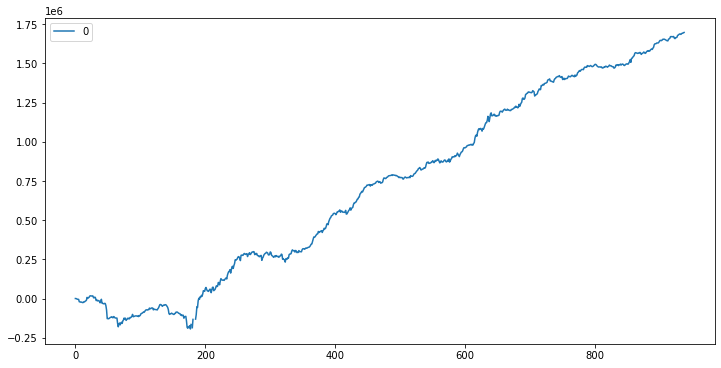

In [ ]:
fig =pd.DataFrame(cum_profit).cumsum().plot(figsize = (12,6))
fig

In [ ]:
pff = (pd.DataFrame(cum_profit)/1000000)*100
pff

,0
0,0.036540
1,-0.016470
2,-0.227988
3,-0.194778
4,-0.039480
...,...
933,0.346655
934,0.421234
935,-0.036361
936,0.365435


<AxesSubplot:>

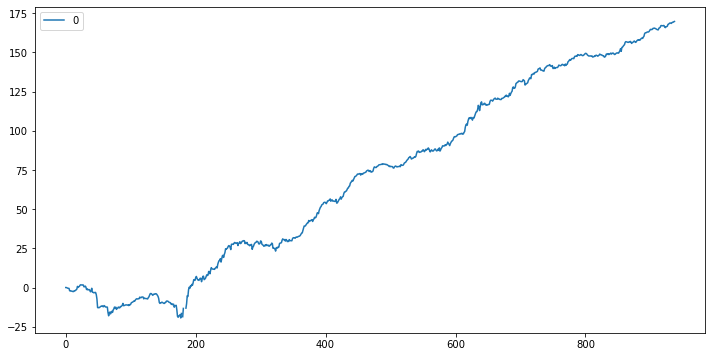

In [ ]:
fig =pd.DataFrame(pff).cumsum().plot(figsize = (12,6))
fig

# FROM HERE I DID ALL THE THINGS YOU SAID LIKE % DRAWDOWN PLOT, CONTINUOUS LOSS DAYS AND LOST VALUE IN THAT PEROID. BUT AFTER THE LONG BACKTEST  TO DO SO IT HAD TO BE RERUN , SO I HAVE JUST LEFT THE CODE LOGIC BUT NO RESULT.

Text(0, 0.5, ' % drawdown')

<Figure size 432x288 with 0 Axes>

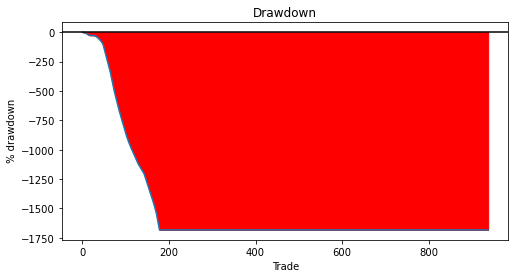

In [ ]:
fig15 = plt.figure()
d = pd.DataFrame(pff)
d
d['Drawdown'] = 0
d[0] = d[0].cumsum()
for i in range (len(d)) :
    max =np.max( np.array(d[0][0 : i+1]) )
    d['Drawdown'].iloc[i] = d[0].iloc[i] - max


fig16 = plt.figure()
d['Drawdown'].plot(figsize = (8,4))
plt.axhline(0 , label ='Line3', color ='black')
plt.fill_between(d.index, d['Drawdown'], color='red')
plt.title("Drawdown")
plt.xlabel('Trade')
plt.ylabel(' % drawdown')

In [ ]:
d[0] = np.where(np.isnan(d[0]) == True , 0 , d['Drawdown']  )
#d[150:200]
#np.isnan(d.iloc[179][0]  )
d[150:200]

,0,Drawdown
150,-1290.010677,-1290.010677
151,-1301.884219,-1301.884219
152,-1313.773404,-1313.773404
153,-1325.038878,-1325.038878
154,-1336.264583,-1336.264583
155,-1346.676985,-1346.676985
156,-1357.106354,-1357.106354
157,-1367.527856,-1367.527856
158,-1378.332963,-1378.332963
159,-1389.495119,-1389.495119


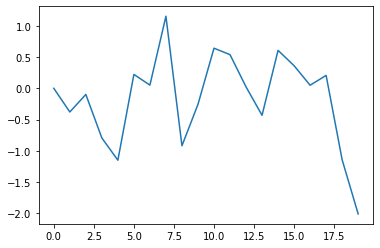

In [ ]:
m = m[0:20]
m['%'] = m.close.pct_change()*100
#m.dropna(inplace = True)
m.reset_index(inplace = True)
m['%'].iloc[0] = 0
plt.plot(m['%'])

In [ ]:
pff

In [ ]:
n_c = 0
c_l = []
for i in range (len(pff)) :
    if pff[0].iloc[i] < 0 :
        n_c = n_c + 1
    elif pff[0].iloc[i] > 0 :
        n_c = 0
    c_l.append(n_c)


In [ ]:
c_l_df = pd.DataFrame(c_l)

In [ ]:
#max countinuous loss days
loss_days = c_l_df.max()[0]
loss_days

In [ ]:
ind = c_l_df[c_l_df[0] == c_l_df.max()[0] ][0].index[0]

In [ ]:
# max loss in max countinuous loss days
loss_mount = pff[0][ind-loss_days + 1 : ind+1].sum()
loss_mount

In [ ]:
return_ = pff[0].cumsum().iloc[-1]
max_drawdown = d['Drawdown'].min()
sharp_ratio = return_/pff[0].cumsum().std()
calmar_ratio = return_/ -max_drawdown
sortino_ratio = return_/d['Drawdown'].std()

ulcer = 0
for i in range (len(d['Drawdown'])) :
    ulcer = ulcer + d['Drawdown'].iloc[i]*d['Drawdown'].iloc[i]
ulcer_ratio = return_/ulcer

profit_trade = 0
loss_trade = 0
win_trade = []
lost_trade = []
for i in range (1 , len(pff[0])) :
    if pff[0].iloc[i] > 0 :
        profit_trade = profit_trade + 1
        win_trade.append(pff[0].iloc[i])
    if pff[0].iloc[i] < 0 :
        loss_trade = profit_trade + 1
        lost_trade.append(pff[0].iloc[i])

Total_trade = len(pff[0])
profit_trade = profit_trade
loss_trade = loss_trade
max_profit = pff[0].max()
max_loss = pff[0].min()
Hit_ratio = profit_trade/loss_trade
avg_win = pd.DataFrame(win_trade).sum()[0]/len(pd.DataFrame(win_trade))
avg_loss = pd.DataFrame(lost_trade).sum()[0]/len(pd.DataFrame(lost_trade))

In [ ]:
pff[0]

,0,Drawdown
0,0.000000,0.000000
1,-0.016470,-0.016470
2,-0.260928,-0.260928
3,-0.700164,-0.700164
4,-1.178880,-1.178880
...,...,...
933,-1683.064163,-1683.064163
934,-1683.064163,-1683.064163
935,-1683.064163,-1683.064163
936,-1683.064163,-1683.064163
